# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ghani Rafif Irawan
- **Email:** ghani.rafif.2112@gmail.com
- **ID Dicoding:** ekickx

## Menentukan Pertanyaan Bisnis

- Bagaimana kuantitas PM 2.5 setiap tahunnya?
- Bagaimana perbandingan kuantitas PM 2.5 antar tiap bulan?
- Bagaimana hubungan antara cuaca dengan kuantitas PM 2.5?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [12]:
!if [ ! -e data ]; then gdown 1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr; unzip *.zip; mv PRSA_Data_20130301-20170228 data; fi

Store on of the datasets into a dataframe

In [13]:
# we will store the dataframe into a list, so it will be easier to access
df = []
df.append(pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv"))
df[0]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


**Insight:**
- `no`: index number
- `year`: year the data recorded (2013-2017)
- `month`: month the data recorded (1-12)
- `day`: day the data recorded (1-31, depends on the `month` & `year`)
- `hour`: hour the data recorded (0-23)
- `PM2.5`: concentration of PM2.5 recorded (µg/m3)
- `PM10`: concentration of PM10 recorded (µg/m3)
- `SO2`: concentration of SO2 recorded (ppb)
- `NO2`: concentration of NO2 recorded (ppb)
- `CO`: concentration of CO recorded (ppm)
- `O3`: concentration of O3 recorded (ppm)
- `TEMP`: temperature in celcius
- `PRES`: pressure recorded
- `DEWP`: DEW Point
- `RAIN`: cummulated hours of rain
- `wd`: wind direction (categorical: N, NNW, NW, WNW, ..., NNE)
- `WSPM`: Water Soluble Particulate Matter
- `station`: where the data were recorded

**Glossarium**

To make sure we're on the same page, here are the list of terminologies:
- PM: PM stands for particulate matter (also called particle pollution), the term for a mixture of solid particles and liquid droplets found in the air.
- PM 10: PM that has diameter of 10 micrometer
- PM 2.5: Fine PM that has diameter of 2.5 micrometer
- WSPM: Water Soluble Particulate Matter

**What are the Harmful Effects of PM?**

Particulate matter contains microscopic solids or liquid droplets that are so small that they can be inhaled and cause serious health problems. Some particles less than 10 micrometers in diameter can get deep into your lungs and some may even get into your bloodstream. Of these, particles less than 2.5 micrometers in diameter, also known as fine particles or PM2.5, pose the greatest risk to health.

**Source**
- https://www.epa.gov/pm-pollution/particulate-matter-pm-basics

### Assessing Data

Check if they are any mismatch data type

In [14]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Check possible missing values

In [15]:
df[0].isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


Check if there are any duplicated data

In [16]:
df[0].duplicated().sum()

0

Check for possible inaccurte value

In [17]:
df[0].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [18]:
df[0].shape

(35064, 18)

**Insight:**
- There's no duplicate
- There're a lot of missing values
  - PM2.5:  925
  - PM10:   718
  - SO2:  	935
  - NO2:  	1023
  - CO: 	  1776
  - O3: 	  1719
  - TEMP: 	20
  - PRES: 	20
  - DEWP: 	20
  - RAIN: 	20
  - wd: 	  81
  - WSPM: 	14
- Convert `month` to categorical data (January...December)
- Based on `year`, `month`, `day`, and `hour`, we will create `time` column that has data type of datetime
- Fill missing data with mean or mode

### Cleaning Data

Fill missing value. We can use mean imputation to fill columns with numerical value

In [19]:
for column in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "WSPM"]:
  df[0][column].fillna(value=(df[0][column].mean()), inplace=True)

df[0].isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Since wind direction, rain, temperature, and pressure are usually change based on the season, we will group it based on `month` first.

And because `wd` is categorical data we will fill the missing data with the mode of each month. While the rest is the mean of each month, because it's numerical data.

In [20]:
# Fill missing values of wd
wd_mode = df[0].groupby('month')['wd'].agg(pd.Series.mode)

for month in range(1, 12+1):
  on_month = (df[0]['month'] == month)
  df[0].loc[on_month,'wd'] = df[0].loc[on_month,'wd'].fillna(wd_mode.loc[month])


# Fill missing value of ran, temp, pres, and dewp
env_mean = df[0].groupby('month').agg({
    'RAIN': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean'
})

for month in range(1, 12+1):
  on_month = (df[0]['month'] == month)
  to_fill = ['RAIN', 'TEMP', 'PRES', 'DEWP']
  df[0].loc[on_month, to_fill] = df[0].loc[on_month, to_fill].fillna({
      'RAIN': env_mean.loc[month, 'RAIN'],
      'TEMP': env_mean.loc[month, 'TEMP'],
      'PRES': env_mean.loc[month, 'PRES'],
      'DEWP': env_mean.loc[month, 'DEWP']
      })

df[0].isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [21]:
df[0].duplicated().sum()

0

**Insight:**
- all columns with missing values has been filled
- there are no duplicate

## Exploratory Data Analysis (EDA)

### Explore `df[0]`

#### Time & PM 2.5

- We will create `date` column based on `year`, `month`, and `day` columns
- And create `month_name` for categorical data of months (January-December)

In [22]:
# Create 'date' column
date_list = []

# we will concatenate in the format "%Y-%m-%d"
for i in df[0].values:
  date = f'{i[1]}-{i[2]}-{i[3]}'
  date_list.append(date)

df[0]["date"] = pd.to_datetime(date_list)

# Create 'month_name' column
df[0]['month_name'] = df[0]['date'].apply(lambda x: x.strftime('%B'))

df[0].sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,month_name
19188,19189,2015,5,9,12,31.0,37.0,12.0,41.0,900.0,51.0,13.9,1014.4,-0.6,0.0,SW,3.8,Aotizhongxin,2015-05-09,May
1304,1305,2013,4,24,8,166.0,145.0,17.0,56.0,1200.0,2.0,14.7,1005.5,8.9,0.0,WSW,0.9,Aotizhongxin,2013-04-24,April
17048,17049,2015,2,9,8,61.0,77.0,41.0,71.0,1500.0,12.0,-7.0,1024.0,-21.0,0.0,NE,1.0,Aotizhongxin,2015-02-09,February
33056,33057,2016,12,7,8,64.0,110.0,21.0,97.0,2600.0,2.0,-2.8,1021.6,-7.9,0.0,SE,0.5,Aotizhongxin,2016-12-07,December
8167,8168,2014,2,4,7,5.0,24.0,18.0,15.0,500.0,52.0,-6.6,1025.8,-24.8,0.0,ENE,1.2,Aotizhongxin,2014-02-04,February


Trend PM 2.5

In [23]:
trendpm_df = df[0].groupby("date")["PM2.5"].mean().reset_index()
trendpm_df.head()

,date,PM2.5
0,2013-03-01,7.125000
1,2013-03-02,30.750000
2,2013-03-03,76.916667
3,2013-03-04,22.708333
4,2013-03-05,148.875000


Mean of PM 2.5 per year

In [24]:
yearpm_df = df[0].groupby('year')['PM2.5'].mean().reset_index()
yearpm_df

,year,PM2.5
0,2013,82.393043
1,2014,90.333581
2,2015,82.134578
3,2016,74.279022
4,2017,94.626679


Mean of PM 2.5 per month

In [25]:
monthpm_df = df[0].groupby(['month', 'month_name', 'year'])['PM2.5'].mean()
monthpm_df = monthpm_df.reset_index(name='mean').pivot(columns='year', index=['month', 'month_name'], values='mean')
monthpm_df

,year,2013,2014,2015,2016,2017
month,month_name,,,,,
1,January,NaN,95.612422,91.520550,68.335667,115.462061
2,February,NaN,142.561715,85.518812,44.977147,71.558935
3,March,110.092742,98.938172,88.174899,101.587773,NaN
4,April,62.751389,99.124767,76.024097,68.083125,NaN
5,May,84.981918,71.763893,59.441291,53.629590,NaN
6,June,106.128223,59.794890,63.937606,58.256709,NaN
7,July,68.911290,93.347332,66.567154,72.656498,NaN
8,August,62.265825,68.100198,47.972943,46.698139,NaN
9,September,79.173297,70.076177,52.376468,57.216065,NaN


#### Weather/Environment & PM 2.5

In [26]:
df[0][['PM2.5','RAIN','TEMP','PRES','DEWP']].corr()

,PM2.5,RAIN,TEMP,PRES,DEWP
PM2.5,1.000000,-0.013956,-0.127238,-0.005737,0.118282
RAIN,-0.013956,1.000000,0.036631,-0.060421,0.080803
TEMP,-0.127238,0.036631,1.000000,-0.827206,0.823223
PRES,-0.005737,-0.060421,-0.827206,1.000000,-0.776472
DEWP,0.118282,0.080803,0.823223,-0.776472,1.000000


Wind Direction and PM 2.5

In [70]:
wdpm_df = df[0].groupby('wd').agg({
    'PM2.5': 'mean',
})

wdpm_df.sort_values(by='PM2.5', ascending=False).head()

,PM2.5
wd,
E,107.704813
ESE,106.102641
ENE,104.900855
SE,99.408229
SSE,96.781340


**Insight:**
- There's a negative correlation between PM & Weather/Environment, but so small, it's negligible
- Different wind direction cause different concentration of PM 2.5

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kuantitas PM tiap tahunnya

#### Average PM 2.5 per Time

Text(0.5, 1.0, 'Average PM 2.5 from 2013-03 to 2017-02')

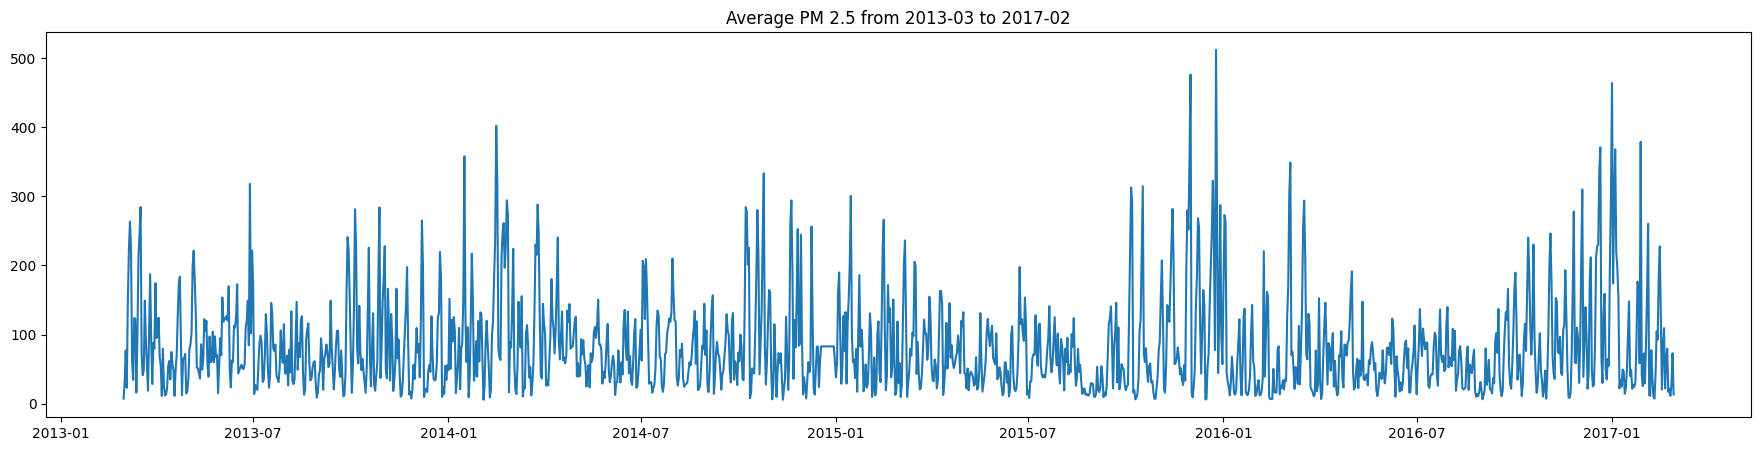

In [60]:
plt.figure(figsize=(22,5))
plt.plot(trendpm_df.date, trendpm_df['PM2.5'])
plt.title('Average PM 2.5 from 2013-03 to 2017-02')

> We can see a pattern that the average concentration of PM 2.5 spike at the start and the end of the year, and going down at the middle of the year

Text(0.5, 1.0, 'Average PM 2.5 per Year')

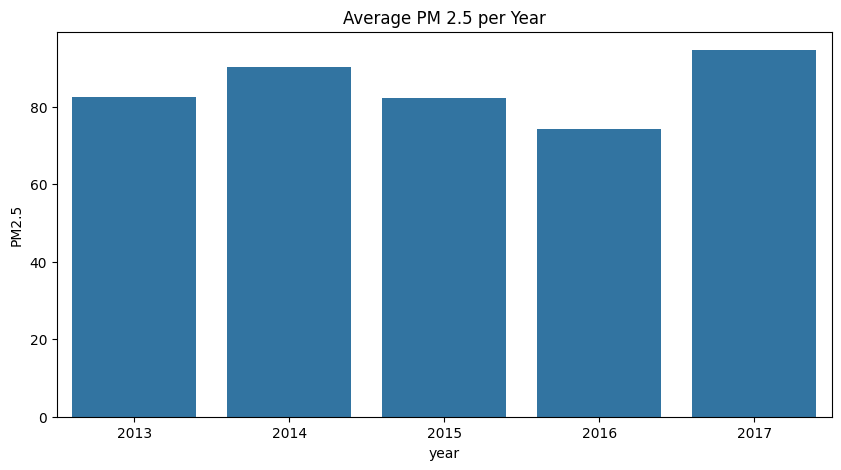

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data=yearpm_df, x='year', y='PM2.5')
plt.title('Average PM 2.5 per Year')

> The concentration of PM 2.5 going down on 2015 and 2016

### Pertanyaan 2: Bagaimana perbandingan kuantitas PM antar tiap bulan?

<Axes: title={'center': 'Heatmap of Average PM 2.5 per Month for each year'}, xlabel='year', ylabel='month-month_name'>

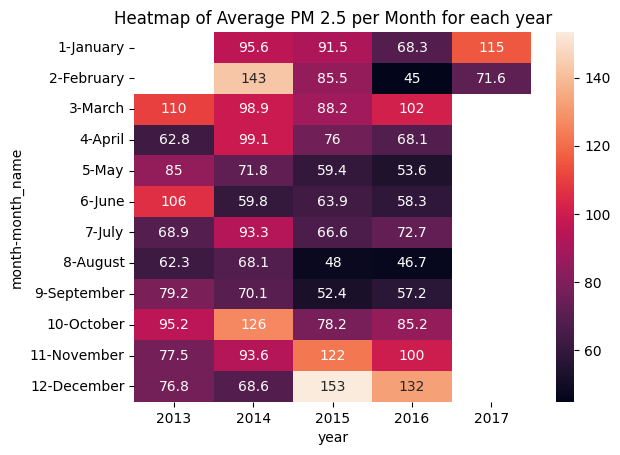

In [59]:
plt.plot(figsize=(8, 8))
plt.title('Heatmap of Average PM 2.5 per Month for each year')
sns.heatmap(monthpm_df, annot=True, fmt='.3g')

<Axes: title={'center': 'Average PM 2.5 per Month'}, xlabel='PM2.5', ylabel='month'>

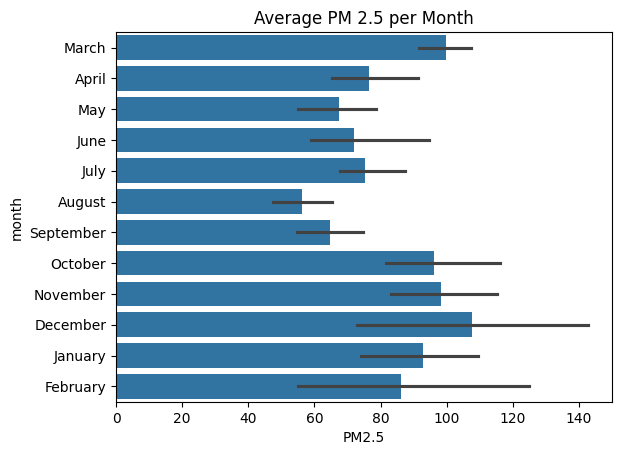

In [57]:
month_mean = df[0].resample(rule='M', on='date')['PM2.5'].mean()
month_mean.index = month_mean.index.strftime('%B')
month_mean = month_mean.reset_index()
month_mean.columns = ['month', 'PM2.5']

plt.plot(figsize=(15, 5))
plt.title('Average PM 2.5 per Month')
sns.barplot(y='month', x='PM2.5', data=month_mean)

> Like the previous diagram, we can see that the PM 2.5 concentration spiked at the end and the start of the year. While the middle of the year usually low in concentration

### Pertanyaan 3: Bagaimana hubungan cuaca dengan kuantitas PM?

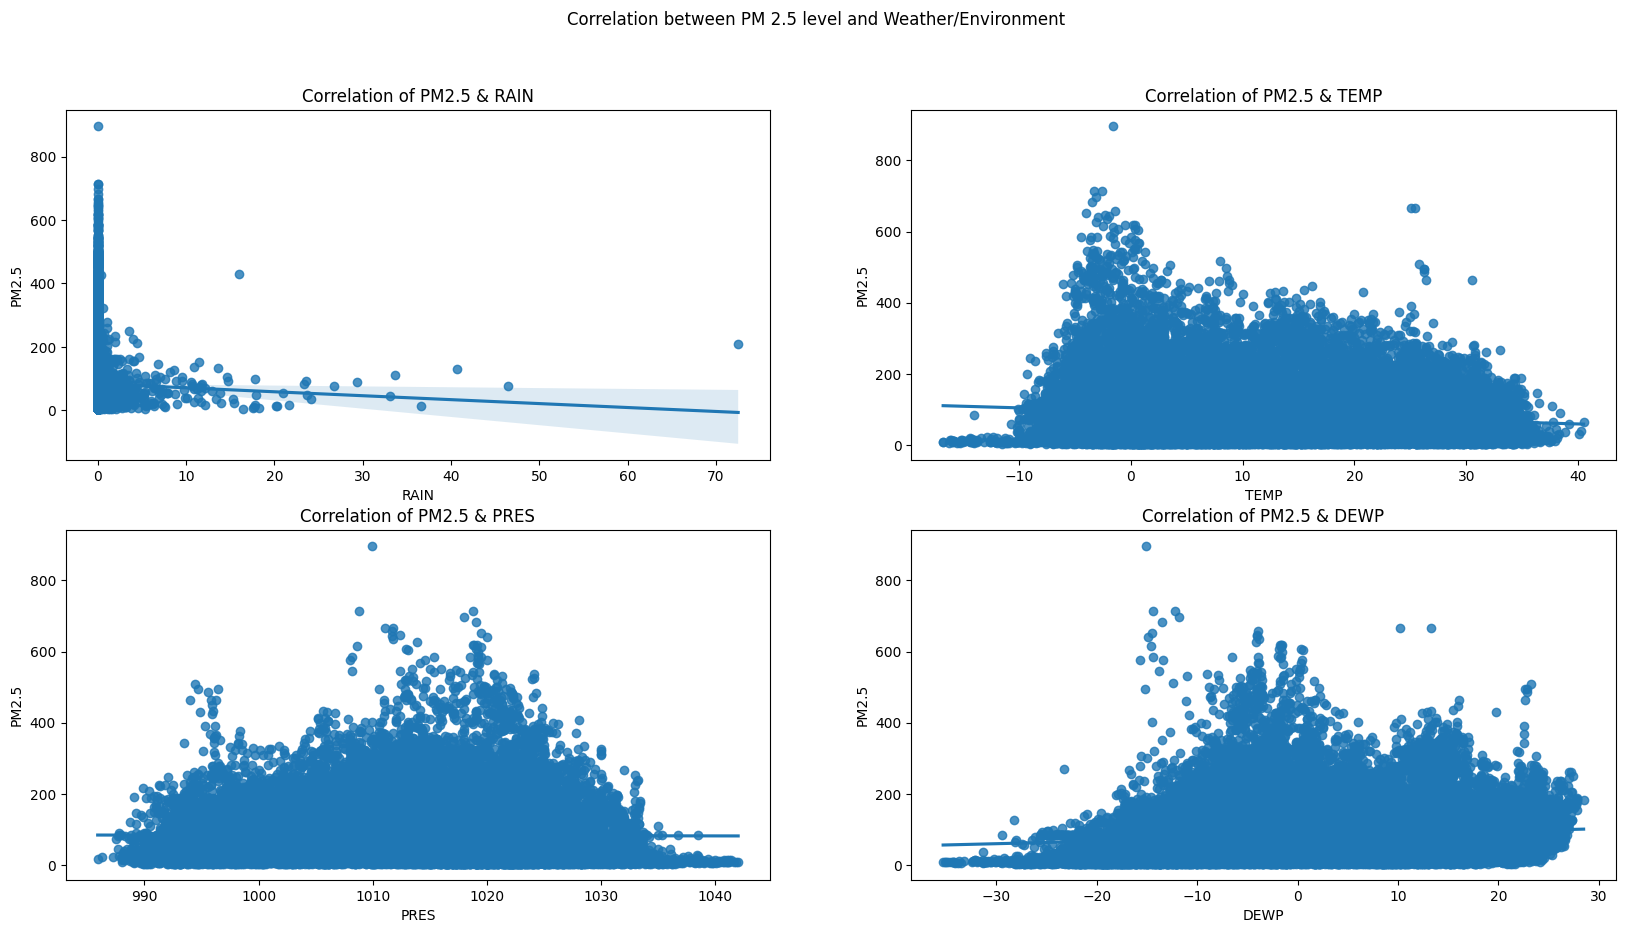

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

plt.suptitle('Correlation between PM 2.5 level and Weather/Environment')
for k, v in enumerate(['RAIN', 'TEMP', 'PRES', 'DEWP']):
  sns.regplot(x=v, y='PM2.5', data=df[0], ax=ax[k%4//2, k%2])
  ax[k%4//2, k%2].set_title('Correlation of PM2.5 & '+v)

>- There's almost no correlation between PM 2.5 and hours of rain because the correlation is approaching zero. But from the plot we can see that the lower hours of rain, the higher the PM 2.5 level
>- There doesn't seem to be any pattern for the rest

Text(0.5, 1.0, 'Wind Direction with Lowest PM 2.5')

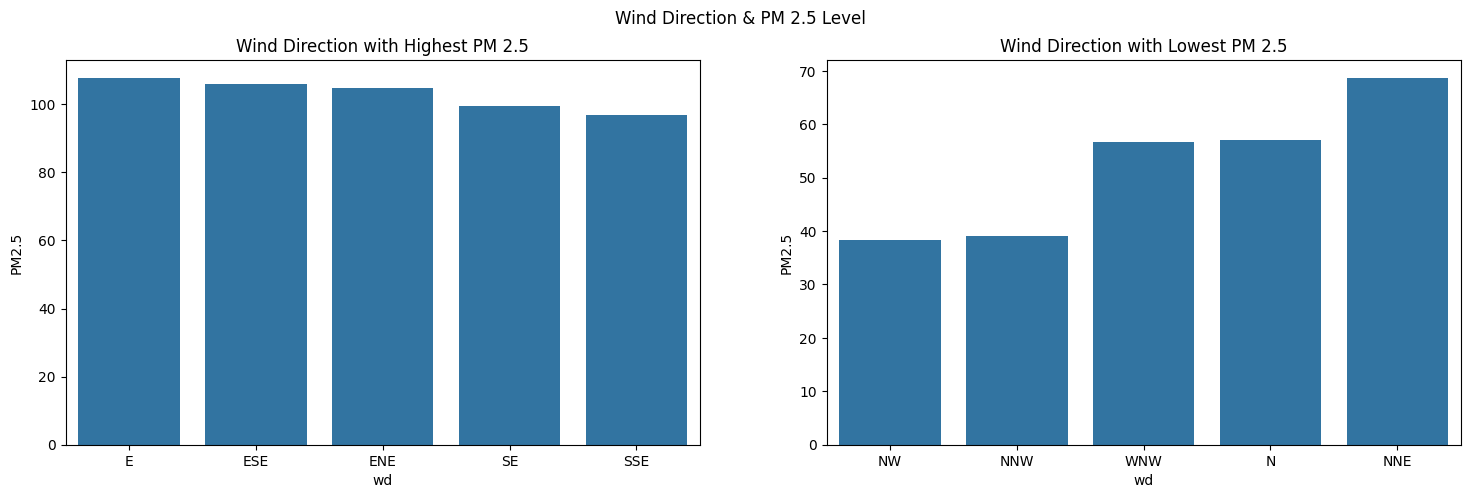

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
plt.suptitle('Wind Direction & PM 2.5 Level')

sns.barplot(x='wd', y='PM2.5', data=wdpm_df.sort_values(by='PM2.5', ascending=False).head(), ax=ax[0])
ax[0].set_title('Wind Direction with Highest PM 2.5')
sns.barplot(x='wd', y='PM2.5', data=wdpm_df.sort_values(by='PM2.5').head(), ax=ax[1])
ax[1].set_title('Wind Direction with Lowest PM 2.5')

>- PM2.5 being the highest when wind direction is East and the lowest when wind direction is North West

**Insight:**
- The concentration of PM 2.5 going down on 2015 and 2016
- Like the previous diagram, we can see that the PM 2.5 concentration spiked at the end and the start of the year. While the middle of the year usually low in concentration
- There's almost no correlation between PM 2.5 and hours of rain because the correlation is approaching zero. But from the plot we can see that the lower hours of rain, the higher the PM 2.5 level
- There doesn't seem to be any pattern for the rest
- PM2.5 being the highest when wind direction is East and the lowest when wind direction is North West

## Analisis Lanjutan (Opsional)

## Conclusion

##### **Bagaimana kuantitas PM 2.5 setiap tahunnya?**
We can't be sure because the data from 2013 missing January & February, while the data from 2017 only has January & February. But the average of PM 2.5 per year seems to be going down. We can see that there're spikes at the start and the end of every year. So it's natural that the average of PM 2.5 in 2017 so high, because it only contain data of the start of the year.

##### **Bagaimana perbandingan kuantitas PM 2.5 antar tiap bulan?**
Like stated above, we can see that usually the average of PM 2.5 spike at the end and the start of the year. So arround Winter

##### **Bagaimana hubungan antara cuaca dengan kuantitas PM 2.5?**
There's a negative correlation but it's negligible. But it appears that when the hours of rain is low, the PM 2.5 level is high. Wind direction also seems to have a correlation with PM 2.5 level. PM2.5 being the highest when wind direction is East and the lowest when wind direction is North West